# 소셜 네트워크 분석 with 'Python' and package 'NetworkX'
- 주제: 한 회사의 구성원 관계도를 통해 어떤 인사이트를 도출할 수 있을까?
- 작성 일시: 2018-05-11
- 수정 일시: 2018-05-11
- 작성자: 부현경 (hyunkyung.boo@gmail.com)
- 참고자료
    - http://www.kocw.net/home/cview.do?cid=9201972a1d121cec(소셜 네트워크 분석, 국민대학교, 곽기영 교수)
    - https://www.slideshare.net/koorukuroo/20140830-pycon2014-networkx

### 1. 들어가기 전에

소셜 네트워크 분석
- 사회 생활은 관게와 이러한 관계에 의해 형성되는 패턴에 의해 창조된다는 전체를 출발점으로 하며 소셜 네트워크는 하나 이상의 관계 유형에 의해 연결된 노드(즉, 네트워크의 구성원인 액터)의 집합으로 정의된다.
- 따라서 소셜 네트워크 분석에서는 이러한 규칙적인 관계 패턴을 구조라 하며 구조를 측정하고 분석하기 위한 다양한 개념과 방법을 제시한다.

액터
- 액터들 간 관계는 크게 4가지 유형(유사성, 사회 관계, 상호작용, 흐름)으로 나눌 수 있다.
    - 유사성(similarity) 유형은 두 액터가 동일한 위치(공간 혹은 시간), 동일한 멤버쉽(이벤트), 동일한 속성(성별, 태도 등)을 공유할 때 발생
    - 사회 관계(social realations) 유형은 친족관계, 친구나 학생 등의 정의된 역할 관계, 정서 관계, 인지관계 등이 포함되고 이 유형은 커뮤니티 연구 등에 흔히 이용됨
    - 상호 작용(interaction) 유형은 대화를 나누거나, 도움을 주거나, 집으로 초대하거나, 조언을 하는 행위와 같이 행태를 기초로 한 연결 관계를 나타냄
    - 흐름(flow) 유형은 액터 간의 교환 또는 이전을 기반으로 한 관계 유형으로 이 유형의 관계를 통해 액터 간에 자원,정보, 영향력이 소셜 네트워크를 통해 흐르게 됨

소셜 네트워크 분석의 구조적, 관계적 접근법
- 소셜 네트워크분석의 이론적, 방법론적 내용의 중심에는 사회적 개체간 관계의 구조적 형태와 내용을 파악하고 이를 측정하여, 이러한 곤계로부터 도출되는 가설을 검증하는 것이 포함되며 이러한 구조적, 관계적(structural, relational) 특성으로 인해 소셜 네트워크 분석은 기존의 개별적 변수 중심적 분석 방법과 구별된다.

In [ ]:
""" --- 1. Call Excel File(.xlrd) --- """
import xlrd

In [2]:
# 항상 경로 설정한다.
path = 'C:\\Users\\User\\Desktop\\snatest.xlsx'
data = xlrd.open_workbook(path, encoding_override='utf-8')
# 엑셀에서 사용할 데이터 인덱스 시트 번호 입력한다.

sheet = data.sheet_by_index(0)
info = "열의 갯수는 {}이고 행의 갯수는 {}입니다.".format(sheet.ncols, sheet.nrows)

In [3]:
""" --- 2. Social Network Analysis --- """
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# {A, B, C, ... } 형태로 중복제거한 노드로 표현하는 함수
def make_nodes(list):
    nodes = set(x for l in list for x in l)
    return nodes

# (A, B) 형태의 엣지로 표현하는 함수
def make_edges(list):
    edges = []
    str = ""
    s_node = list[0]
    for i in range(1, len(list)):
        e_node = list[i]
        values = (s_node, e_node)
        edges.append(values)
    return edges

In [5]:
""" --- 2-1. Make Nodes Set --- """
# 엑셀에서 불러온 데이터들을 네트워크 분석을 위한 노드들의 집합으로 데이터 정제한다.
nodes_list = []
for r in range(0, sheet.nrows):
    col_list = []
    for c in range(0, sheet.ncols):
        node = sheet.cell(r, c).value
        if node != '':
            col_list.append(sheet.cell(r, c).value)
            # print(col_list)
    nodes_list.append(col_list)

In [6]:
""" --- 2-2. Social Network Analysis --- """
#add_edge의 매개변수를 만들기 위해 for 문을 사용한다.
total_edges = []
for i in range(0, len(nodes_list) - 1):
    values = make_edges(nodes_list[i])
    total_edges += values

In [47]:
#한글 깨짐 문제 해결
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

### 2-1. 소셜 네트워크 개념과 지표 (연결, 디그리, 밀도, 거리)

#### 1. 연결
    - 많은 연결 관계를 가지고 있다는 것은 종종 많은 다양한 정보에 노출되어 있다는 것을 의미한다.
    - 매우 잘 연결된 사람은 다른 사람에 대해 좀더 많은 영향력을 행사할 수도 있고 반대로 좀더 많은 영향을 받을 수 있다.
    - 소셜 네트워크는 액터와 액터간 연결관계로 정의되며 포함된 액처의 수로 나타내는 네트워크의 크기는 소셜 네트워크 분석에 있어 중요한 변수 중 하나이다.
    - 액터들이 갖고 있는 연결 관계의 갯수와 성격에 대한 차이는 액터들 간의 유사성을 판단하는 기준으로 활용할 수 있다.
    - N개의 액터를 갖는 네트워크에서 가능한 액터 간의 연결 관계는 N(N-1)개이다. (액터의 수가 선형함수적으로 증가할 때 가능한 관계의 수는 지수함수적으로 증가한다.) => 네트워크 구조의 복잡성(complexity)이 지수함수적으로 증가한다.

#### 2. Degree
    - 디그리는 노드에 연결된 라인의 갯수를 의미
    - 노드 디그리는 그 노드가 나태내는 액터의 활동성(activity)를 표현 => 따라서 디그리는 액터의 중심성을 나타내는 중요한 지표 중 하나이다.
    - 노드 디그리 평군은 액터들의 평균적인 연결정도를 의미하며 네트워크내의 모든 노드 디그리를 더한 후 노드의 개수로 나눈다.
    - 노드 디그리 분산 정도의 측정은 네트워크 내 액터들의 균등성(unifomity)을 파악하는데 있어 유용할 수 있다.
    - 또한, 노드 디그리 분산은 네트워크 내 액터들의 활동성 차이 정도를 나타내며 각 노드 디그리와 노드 디그리 평균 간의 편차 제곱합을 노드의 갯수로 나눈다.
    - 노드 디그리의 분산은 네트워크 집중도를 나타내는 중요한 지표 중 하나이다.

#### 3. Density(밀도)
    - 밀도는 네트워크에서 노드 간의 전반적인 연결정도의 수준으 나타내며 네트워크 내의 노드 간 연결이 많을 수록 그 네0트워크의 밀도는 높다.
    - 따라서 네트워크 밀도는 네트워크 내의 라인의 갯수(즉, 디그리)로 측정할 수 있으며, 라인의 갯수가 많을 수록 그 네트워크의 밀도는 높다고 할 수 있다. 그러나 네트워크의 밀도를 단순히 라인의 개수만으로 측정하게 되면 네트워크의 크기를 반영할 수 없어 네트워크 간의 비교가 어렵다.
    - 이러한 단점을 보안하기 위해 밀도는 일반적으로 네트워크 내에 존재하는 최대 가능한 라인의 갯수 대비 실제 존재하는 라인의 갯수의 비율로 측정한다.

#### 4. Inclusiveness(포괄성)
    - 네트워크 내의 연결된 노드의 갯수를 나타내며, 그 네트워크에 포함된 총 노드의 갯수에서 고립노드(연결 관계가 없는 노드)의 갯수를 빼서 구한다.
    - 그렇지만 이 방식은 네트워크 크기가 다를 경우 네트워크 간 비교를 어렵게 만든다. 따라서 서로 다른 다양한 네트워크를 비교하기 위해서는 총 노드의 갯수 대비 연결된 노드의 갯수로 포괄성을 구하는 것이 하나의 대안이 될 수 있다.

#### 5. distance(거리)
    - 네트워크 내에서의 액터들의 상대적 차이를 이해하기 위한 방법 중 하나가 액터 간 거리를 측정하는 것이다.
    - 거리는 단어의 의미상 액터 간에 서로 얼마나 떨어져 있는가를 나타내며, 이는 역으로 말하면 액터 간에 서로 얼마나 가깝게 위치하는가를 의미하기도 하며 두 액터간의 거리는 한 액터에서 다른 액터까지 몇 단계를 거처 도달하는 가로 측정된다.

In [92]:
""" --- 2-3. Draw Simple Social Network --- """
#add_edge의 매개변수를 만들기 위해 for 문을 사용한다.
total_edges = []
for i in range(0, len(nodes_list) - 1):
    values = make_edges(nodes_list[i])
    total_edges += values

    

# 네트워크를 그릴 빈 그래프를 정의한다.
# Graph()는 무방향, DiGraph()는 방향성이 있는 그래프
g = nx.Graph()

g.add_edges_from(total_edges)

# 디그리 계산하기
degree = nx.degree(g)
print(degree)

# 기존 리스트를 딕셔너리형인 Key와 Value로 변경하여 Key에 해당하는 Value값을 가져올 것이다.
# Key에는 변하지 않는 값을 사용하고, Value에는 변하는 값과 변하지 않는 값 모두 사용가능
# [('강병훈', 7)] => '강병훈': 7
degree_dict = dict(degree)
print(degree_dict)

[('강병훈', 7), ('양도경', 8), ('탁현주', 7), ('장희정', 9), ('김연희', 8), ('강지예', 5), ('한지예', 7), ('유환희', 5), ('채정훈', 6), ('안지혜', 8), ('문성길', 6), ('최인환', 7), ('이덕권', 10), ('지형태', 3), ('부현경', 5), ('한창수', 3)]
{'강병훈': 7, '양도경': 8, '탁현주': 7, '장희정': 9, '김연희': 8, '강지예': 5, '한지예': 7, '유환희': 5, '채정훈': 6, '안지혜': 8, '문성길': 6, '최인환': 7, '이덕권': 10, '지형태': 3, '부현경': 5, '한창수': 3}


- 노드와 엣지의 총 개수를 반환한다.
    - print(g.number_of_nodes())
    - print(g.number_of_edges())
- 모든 노드와 엣지를 리스트 형태로 반환한다.
    - list(g.nodes)
    - list(g.edges)

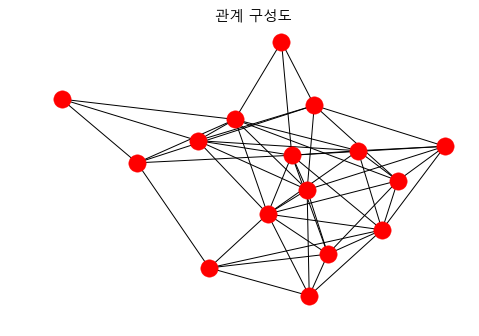

In [102]:
# 첫번째 네트워크
nx.draw(g)
plt.title('관계 구성도')
plt.show()

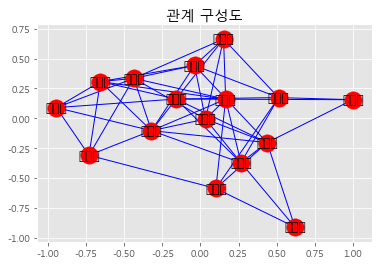

In [142]:
node_color='blue'
edge_color='blue'
labels=None

graph_pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g,graph_pos, de_color=node_color)
nx.draw_networkx_edges(g,graph_pos, edge_color=edge_color)
nx.draw_networkx_labels(g, graph_pos, font_size=node_text_size)

# nx.draw_networkx_nodes(g,graph_pos, alpha=node_alpha, font_size=node_text_size, de_color=node_color)
# nx.draw_networkx_edges(g,graph_pos, width=edge_tickness, alpha=edge_alpha,edge_color=edge_color)
# nx.draw_networkx_labels(g, graph_pos, font_size=node_text_size)

if labels is None:
    labels = range(len(total_edges))

edge_labels = dict(zip(total_edges, labels))
plt.title('관계 구성도')
plt.show()

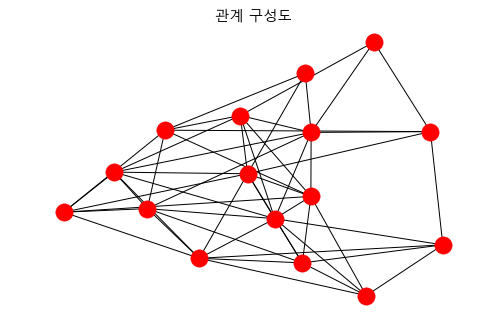

In [137]:
# 두번째 네트워크
nx.draw(g, pos=nx.spring_layout(g))
plt.title('관계 구성도')
plt.show()

### 2-2. 소셜 네트워크 개념과 지표 (중심성)

#### 6. 중심성(Cetrality)
- 파워를 가져다 주는 유리한 구조적 위치에 대한 디그리, 근접, 매개 관점을 중심성의 개념으로 보며 이 들 세 개의 관점에 따흔 액터의 위치를 네트워크 내에서 액터 형채가 얼마나 '중심적'인가 하는 시각에서 바라본다.

    ##### 디그리 중심성 (Degree Cetrality)
        - 액터 간 연결 정도를 기반으로 한 중심성 ex. 많은 액터들과 많은 연결 관계를 가지고 있는 액터는 여러가지 측면에서 위치적 우위를 가짐
        - 네트워크 크기에 영향을 받는다. 네트워크 크기와 디그리 중심성은 비례 관계
        - 액터 간 비교를 위해서는 네트워크 크기가 디그리 중심성에 미치는 영향을 제거할 필요가 있다 즉, 이를 위해 표준화 작업 필요
        - 0 < Cd(Ni) < 1 (1에 가까울수록 액터의 네트워크 내에서의 관여도 증가)

    ##### 근접 중심성(Closeness Cetrality)
        - 디그리 중심성과는 달리 근접 중심성은 네트워크 내에서의 간접적 연결까지 고려하여 한 액터와 다른 모든 액터간의 거리를 강조
        - 디그리 중심성이 액터의 '활동성'을 강조한 반면, 근접 중심성은 액터의 '독립성'을 강조
        - 높은 근접 중심성을 갖는 애터는 네트워크 내의 모든 사람에게 쉽게 도달할 수 있기 때문에 네트워크 내에서 네트워크 자원을 더욱 쉽게 동원할 수 잇는 중심적 역할을 수행할 가능성이 높으며, 이를 통해 파워를 획득할 수 있음
        - 액터 근접 중심성은 소셜 네트워크 내에서 한 노드가 다른 노드들과 얼마나 가가이 있는가를 측정하고 이 때, 근접이란 한 액터가 다른 액터들과 직접적으로 또는 소수의 중개자를 통해 얼마나 빨리 소통할 수 있는가를 나타내는 것임
        - 액터의 근접 중심성은 다른 모든 액터들과의 최단 경로 거리의 함수(특정 액터 i와 나머지 (g-1)액터 간 최단 경로 거리 합의 역수)

    ##### 매개 중심성 (Berweenness Cetrality)
        - 액터가 직접 연결되어 있지 않은 액터들 간 관계를 통제 또는 중개하는 정도를 나타냄
        - 매개 중심성은 인접한 네트워크가 아닌 전체 네트워크를 대상으로 계산되며 네트워크 내 어디에 위치하고 있는가가 중심성을 결정하는 중요한 요소로 고려됨
        - 액터가 소셜 네트워크 내 액터쌍 간의 최단 경로 상에 위치하는 정도를 측정
        - 매개 중심성은 네트워크 내의 정보교환 또는 자원 흐름에 대한 통제 능력을 나타내는 중요한 지표이다.
        - ex. 두 액터가 하나 이상의 최단 경로에 의해 연결되어 있고 내가 그 모든 경로상에 위치하고 있다면, 나는 두 액터에 대해 막강한 파워를 행사할 수 있다.

    ##### 아이겐벡터 중심성 (Eigenvector Cetrality)
        - 연결된 액터의 개수뿐만 아니라 연결된 액터가 얼마나 중요한지도 함께 고려해 구성되어 확장된 디그리 중심성 개념)
        - 아이겐벡터 중심성은 낮은 디그리 중심성을 갖는 액터가 높은 디그리 주심성을 갖는 액터와 연결될 때, 또는 그 반대로 높은 디그리 중심성을 갖는 액터가 낮은 디그리 중심성을 갖는 액터와 연결될 때 민감하게 변화됨
        
    ##### 베타 중심성 (Beta Cetrality)
        - 위의 중심성 지표들의 문제점을 해결하기 위해 새롭게 제안된 중심성 지표
        - 베타 중심성은 네트워크 분석시 파라미터 베타를 지정 (-1 <= 베타 <= 1)
        - ex. 작은 베타값은 에고를 둘러싼 로컬 네트워크 구조에 좀 더 가중치를 부여, 큰 베타값은 에고와 간접적으로 연결되는 더 넓은 네트워크 구조에 좀 더 가중치를 부여하는 것이다.
        - ex. 양수 베타값은 액터가 중심성이 높은, 즉 많은 연결 관계를 갖고 있는 다른 액터들에게 연결되는 것이 좋은 의미라는 것을 나타내며 음수 베타값은 액터가 중심성이 높은, 즉 많은 연결 관계를 갖고 있는 다른 액터들에게 연결되는 것이 그 액터에게 불리하게 작용한다는 것을 의미한다.
        - 정리하면 네트워크 내에서 다른 액터의 영향력이 긍정적/보완적의미라면 양수 베타 값, 부정적/경쟁적 의미를 음수 베타 값으로 설정한다.

In [ ]:

# 노드를 가지고 오는 함수
# g_nodes = g.nodes()
# print(g_nodes)

# 네트워크를 매트릭스로 변환하는 함수
# matrix_g = nx.to_numpy_matrix(g)
# print(matrix_g)

# 네트워크 중심성을 계산하는 함수


#nx.draw_shell(g)
#nx.draw(g)
nx.draw(g, node_size=[v*50 for v in degree_dict.values()])
#nx.draw_circular(g)
#nx.draw_graphviz(g)
#nx.draw_shell(g)
#nx.draw_spectral(g)
#nx.draw_spring(g)
#nx.degree_histogram(g)

